<a href="https://colab.research.google.com/github/atasighosh/Atasi/blob/main/Netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
netflix="/content/drive/My Drive/combined_data_1.txt"
df=pd.read_csv(netflix,header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
# No. of customers in the dataset
cust_count=df["Cust_Id"].nunique()
cust_count

475257

In [ ]:
# no. of movieId
movie_isn_count=df.isnull().sum()
movie_isn_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
# no. of movies rated
rating_count=df["Cust_Id"].count()-movie_isn_count
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [ ]:
# no. of customer with ratings 1,2,3,4,5
stars=df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


<Figure size 1500x1000 with 0 Axes>

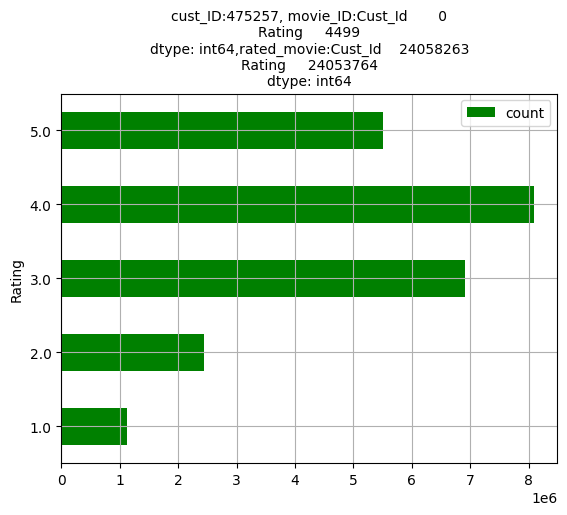

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
stars.plot.barh(color="g")
plt.title(f'cust_ID:{cust_count}, movie_ID:{movie_isn_count},rated_movie:{rating_count}', fontsize=10)
plt.grid(True)

In [ ]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(df.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
# number of rated movies
df_nan=df_nan[df_nan["Rating"]==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
# reset index column
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1


In [ ]:
# Account for last record and corresponding length
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

In [ ]:
df=df[pd.notnull(df['Rating'])]
df['Movie_Id']=movie_np.astype(int)
df['Cust_Id']=df['Cust_Id']
#print("Now the dataset will look like: ")
df.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


Benchmark

In [ ]:
f=['count','mean']
dataset_movie_summary=df.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [ ]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [ ]:
#movie_id below benchmark
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [ ]:
dataset_cust_summary=df.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
10,49,3.346939
1000004,1,5.000000
1000027,30,4.300000
1000033,101,3.316832
1000035,20,4.400000
...,...,...
999964,48,4.062500
999972,35,4.057143
999977,14,3.714286


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

Trimming netflix dataset

In [ ]:
dataset=df[~df['Movie_Id'].isin(drop_movie_list)]
dataset=df[~df['Cust_Id'].isin(drop_cust_list)]
print('Before the triming, the shape is: {}'.format(df.shape))
print('After the triming, the shape is: {}'.format(dataset.shape))

Before the triming, the shape is: (24053764, 3)
After the triming, the shape is: (18454563, 3)


In [ ]:
# import pandas as pd
# df_p = pd.pivot_table(df2,values='Rating',index='Cust_Id',columns='Movie_Id')

# print(df_p.shape)

In [ ]:
movie_titles="/content/drive/My Drive/movie_titles.csv"
df_title = pd.read_csv(movie_titles,  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


Scikit library for SVD implimentation

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357248 sha256=3dc3d475790ee05c2a4906069f5d88ae87d363c54ca7db6951648cb4f7ef0696
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import math
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [ ]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0082  1.0088  1.0157  1.0109  0.0034  
MAE (testset)     0.8089  0.8119  0.8078  0.8096  0.0018  
Fit time          1.34    1.34    1.76    1.48    0.20    
Test time         0.41    0.17    0.54    0.38    0.15    


{'test_rmse': array([1.0081542 , 1.00877083, 1.01569871]),
 'test_mae': array([0.80893469, 0.81194869, 0.80776895]),
 'fit_time': (1.3361334800720215, 1.3394882678985596, 1.763110637664795),
 'test_time': (0.4095454216003418, 0.1748964786529541, 0.5416774749755859)}

**To find all the movies rated as 5 stars by user with userId = 712664**

In [ ]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Series([], Name: Name, dtype: object)

**Train an SVD to predict ratings for user with userId = 1**

In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                           Name  Estimate_Score
3455  2004.0                                 Lost: Season 1        4.611455
4426  2001.0                        The West Wing: Season 3        4.520544
2113  2002.0                                        Firefly        4.466842
2101  1994.0                         The Simpsons: Season 6        4.404630
3443  2004.0          Family Guy: Freakin' Sweet Collection        4.375247
1475  2004.0                       Six Feet Under: Season 4        4.361866
3961  2003.0                      Finding Nemo (Widescreen)        4.337853
2451  2001.0  Lord of the Rings: The Fellowship of the Ring        4.334254
2056  2001.0             Buffy the Vampire Slayer: Season 6        4.294380
4237  2000.0                                      Inu-Yasha        4.275947
